## 주요 내용
* [dataframe 생성해보기](#1.dataframe-생성해보기)
* [파이썬 자료구조를 이용해서 생성하기](#2.파이썬-자료구조를-이용해서-생성하기)
* [csv 파일 읽기](#3.csv-파일-읽기)


In [1]:
import pandas as pd
import numpy as np


In [2]:
pd.__version__

'0.22.0'

# DataFrame

    . 행과 열에 레이블을 가진 2차원 데이터
    . 열마다 다른 형태를 가질 수 있음
    . 테이블 형 데이터에 대해 불러오기, 데이터 쓰기가 가능
    . 데이터프레임끼리 여러 가지 조건을 사용한 결합 처리가 가능
    . 크로스 집계가 가능

# 1.dataframe 생성해보기

      . 데이터, 인덱스, 칼럼을 만들다.
      . 각 칼럼은 하나의 자료형만 처리가 가능하다.
      

### 데이터, index, columns 만든다

#### 데이터 프레임 값에 들어갈 것을 리스트의 리스트로 정의

In [3]:
ll = [[1,2,3],[4,5,6],[7,8,9]]

####  행의 레이블에 들어갈 값을 정의

In [4]:
index = ['a','b','c']

#### 열의 레이블에 들어갈 값을 정의 

In [5]:
columns = ['c1','c2','c3']

### DataFrame 클래스를 가지고 값을 넣어서 생성한다.

#### 데이터프레임의 구조

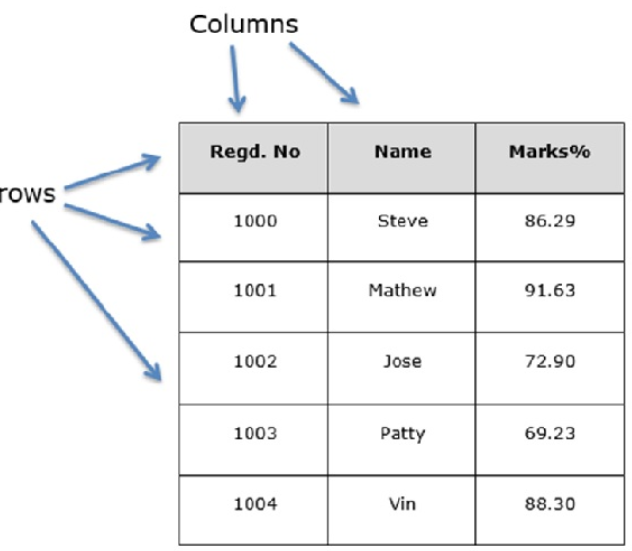

In [6]:
from  IPython.display import Image

Image("dataframe_row_col_pic.png")

#### 값, 인덱스, 칼럼을 넣고 데이터프레임을 생성한다

In [7]:
df = pd.DataFrame(ll, index, columns)

#### 데이터프레임으로 생성한 인스턴스를 확인한다

In [8]:
df

c1  c2  c3
a   1   2   3
b   4   5   6
c   7   8   9

### 내부 속성 칼럼 및 인덱스  조회

    . 인덱스는 0축이고 칼럼은 1축이다. 
    

#### 데이터 프레임에 인덱스를 조회한다

In [9]:
df.index

Index(['a', 'b', 'c'], dtype='object')

#### 데이터 프레임에 있는 칼럼을 조회한다

In [10]:
df.columns

Index(['c1', 'c2', 'c3'], dtype='object')

#### 데이터 프레임 내에 있는 인덱스와 칼럼이 들어간 축을 조회한다.


In [11]:
df.axes

[Index(['a', 'b', 'c'], dtype='object'),
 Index(['c1', 'c2', 'c3'], dtype='object')]

### 데이터 값을 관리하는 내부 구조 알아보기

#### 데이터를 관리하는 values 속성
      . numpy 내의 ndarray의 인스턴스로 구성된다.

In [12]:
df.values

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int64)

#### 실제 데이터와 연결된 속성은 data

In [13]:
df.values.data

#### 데이터 관리는 numpy 모듈의 ndarray 클래스의 인스턴스

In [14]:
type(df.values)

numpy.ndarray

### 모양과 차원 등을 확인

      . 실제 값이 가진 구조을 shape와 ndim 으로 조회가 가능하다

#### 실제 데이터는 1차원으로 구성되지만 보여줄 때 차원을 관리

In [15]:
df.shape

(3, 3)

#### 데이터 구성된 차원을 확인한다.

In [16]:
df.ndim

2

#### size는 행과 열에 대한 처리

    . 전체 데이터에 대한 원소 개수를 표시한다.
    . 2차원인 경우는 행과 열을 곱한 개수가 전체 원소의 개수이다.

In [17]:
df.size

9

#### 데이터 프레임 내의 칼럼들의 타입을 알아보기 

In [18]:
df.dtypes

c1    int64
c2    int64
c3    int64
dtype: object

### 메소드를 이용해서 정보 확인 

#### 내부 메소드를 가지고 dict 타입처럼 keys와 items를 처리할 수 있다.

In [19]:
df.keys()

Index(['c1', 'c2', 'c3'], dtype='object')

#### items 메소드는 제너레이터를 생성해서 내부 데이터를 접근할 수 있다.

In [20]:
df.items()

<generator object DataFrame.iteritems at 0x000000000FD5B0F8>

#### items 메소드의 키는 칼럼명

In [21]:
for k,_ in df.items() :
    print(k)

c1
c2
c3


#### items 메소드의 값은 칼럼 내의 시리즈 정보를 보낸다

In [22]:
for _,v  in df.items() :
    print(type(v), v)

<class 'pandas.core.series.Series'> a    1
b    4
c    7
Name: c1, dtype: int64
<class 'pandas.core.series.Series'> a    2
b    5
c    8
Name: c2, dtype: int64
<class 'pandas.core.series.Series'> a    3
b    6
c    9
Name: c3, dtype: int64


# 2.파이썬 자료구조를 이용해서 생성하기

      . 딕셔너리 등 파이썬 자료구조를 넣어서 생성이 가능하다.
      

### 딕셔너리 이용해서 생성하기

     . dict 내의 키는 columns에 지정한 것으로 처리된다.
     . columns 내에 리스트로 줄 경우에는 순서로 생성된다.

In [23]:
data = {'AAA' : [4,5,6,7], 
        'BBB' : [10,20,30,40],
        'CCC' : [100,50,-30,-50]}

In [24]:
df = pd.DataFrame(data, columns=['BBB','CCC','AAA'])

In [25]:
df

BBB  CCC  AAA
0   10  100    4
1   20   50    5
2   30  -30    6
3   40  -50    7

### 복합으로 구성하면 칼럼과 행에 대한 것이 만들어진다.

     . dict 내에 dict가 있으면 내부의 dict의 키값이 index로 처리된다.
     

In [26]:
data = {'AAA' : {'a' : 4,'b':5, 'c':6, 'd':7}, 
        'BBB' : {'a': 10, 'b' : 20, 'c':30, 'd': 40},
        'CCC' : {'a':100.2, 'b': 50.3, 'c': -30.4, 'd': -50.3} }


In [27]:
df = pd.DataFrame(data)

In [28]:
df

AAA  BBB    CCC
a    4   10  100.2
b    5   20   50.3
c    6   30  -30.4
d    7   40  -50.3

####  특정 칼럼의 타입을 변경하기

      . astype 메소드를 이용해서 칼럼의 타입을 변경할 수 있다.
      . 새로운 결과가 나오므로 기존 데이터 프레임이 칼럼에 할당해서 넣어줘야 바뀐다.
      

In [29]:
df.CCC.dtypes

dtype('float64')

In [30]:
df.CCC.astype('int64')

a    100
b     50
c    -30
d    -50
Name: CCC, dtype: int64

#### 기존 값이 변경이 되지 않는다.

In [31]:
df

AAA  BBB    CCC
a    4   10  100.2
b    5   20   50.3
c    6   30  -30.4
d    7   40  -50.3

#### 기존 칼럼에 값을 바꾼다.

In [32]:
df['CCC'] = df.CCC.astype('int64')

In [33]:
df.dtypes

AAA    int64
BBB    int64
CCC    int64
dtype: object

### 여러 개 칼럼이 타입을 변경해서 처리할 경우

    . 이 때도 실제 별도의 데이터 프레임을 만들어서 칼럼의 데이터 타입을 변경한다.
    

In [34]:
df.astype({'AAA':np.float64, 'BBB' : np.float64})

AAA   BBB  CCC
a  4.0  10.0  100
b  5.0  20.0   50
c  6.0  30.0  -30
d  7.0  40.0  -50

In [35]:
df

AAA  BBB  CCC
a    4   10  100
b    5   20   50
c    6   30  -30
d    7   40  -50

# 3.csv 파일 읽기

      . read_csv 함수를 이용해서 자료를 읽을 수 있다.

### csv 파일을 읽는다

In [36]:
anime = pd.read_csv("./anime/anime.csv",encoding="utf-8")

#### 데이터 프레임으로 처리된 것을 head 메소드로 조회

In [37]:
anime.head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

### 특정 칼럼만 가져오기

    . 전체 데이터 중에 일부만 가져오려면 usecols 내에 리스트로 칼럼명을 넣어서 파일을 읽는다.

#### 새로운 파일을 읽어서 데이터 프레임을 만든다.

      . usecols를 이용해서 두개의 칼럼만 가져온다

In [38]:
movie = pd.read_csv("./data/data/movie.csv",usecols = ['movie_title','director_name'])

#### 읽어온 칼럼을 조회

In [39]:
movie.columns

Index(['director_name', 'movie_title'], dtype='object')

In [40]:
movie.head()

director_name                                 movie_title
0      James Cameron                                      Avatar
1     Gore Verbinski    Pirates of the Caribbean: At World's End
2         Sam Mendes                                     Spectre
3  Christopher Nolan                       The Dark Knight Rises
4        Doug Walker  Star Wars: Episode VII - The Force Awakens

### 특정 칼럼을 인덱스로 정의해서 파일을 읽기 

#### 특정 칼럼을 인덱스로 지정해서 파일을 읽는다.

In [41]:
movie_idx = pd.read_csv("./data/data/movie.csv",index_col='movie_title')

#### 인덱스로 구성된 것을 확인

In [42]:
movie_idx.head()

color      director_name  \
movie_title                                                            
Avatar                                      Color      James Cameron   
Pirates of the Caribbean: At World's End    Color     Gore Verbinski   
Spectre                                     Color         Sam Mendes   
The Dark Knight Rises                       Color  Christopher Nolan   
Star Wars: Episode VII - The Force Awakens    NaN        Doug Walker   

                                            num_critic_for_reviews  duration  \
movie_title                                                                    
Avatar                                                       723.0     178.0   
Pirates of the Caribbean: At World's End                     302.0     169.0   
Spectre                                                      602.0     148.0   
The Dark Knight Rises                                        813.0     164.0   
Star Wars: Episode VII - The Force Awakens                     NaN       NaN   

                                            director_facebook_likes  \
movie_title                                                           
Avatar                                                          0.0   
Pirates of the Caribbean: At World's End                      563.0   
Spectre                                                         0.0   
The Dark Knight Rises                                       22000.0   
Star Wars: Episode VII - The Force Awakens                    131.0   

                                            actor_3_facebook_likes  \
movie_title                                                          
Avatar                                                       855.0   
Pirates of the Caribbean: At World's End                    1000.0   
Spectre                                                      161.0   
The Dark Knight Rises                                      23000.0   
Star Wars: Episode VII - The Force Awakens                     NaN   

                                                actor_2_name  \
movie_title                                                    
Avatar                                      Joel David Moore   
Pirates of the Caribbean: At World's End       Orlando Bloom   
Spectre                                         Rory Kinnear   
The Dark Knight Rises                         Christian Bale   
Star Wars: Episode VII - The Force Awakens        Rob Walker   

                                            actor_1_facebook_likes  \
movie_title                                                          
Avatar                                                      1000.0   
Pirates of the Caribbean: At World's End                   40000.0   
Spectre                                                    11000.0   
The Dark Knight Rises                                      27000.0   
Star Wars: Episode VII - The Force Awakens                   131.0   

                                                  gross  \
movie_title                                               
Avatar                                      760505847.0   
Pirates of the Caribbean: At World's End    309404152.0   
Spectre                                     200074175.0   
The Dark Knight Rises                       448130642.0   
Star Wars: Episode VII - The Force Awakens          NaN   

                                                                     genres  \
movie_title                                                                   
Avatar                                      Action|Adventure|Fantasy|Sci-Fi   
Pirates of the Caribbean: At World's End           Action|Adventure|Fantasy   
Spectre                                           Action|Adventure|Thriller   
The Dark Knight Rises                                       Action|Thriller   
Star Wars: Episode VII - The Force Awakens                      Documentary   

                                                   ...           \
movie_title   

#### 내부의 각 칼럼의 데이터 타입을 확인한다.

      . get_dtype_counts 메소드를 이용해서 실제 칼럼이 데이터 타입이 구성된 것을 확인한다.
      

In [43]:
movie_idx.get_dtype_counts()

float64    13
int64       3
object     11
dtype: int64

#### 특정 타입에 대한 정보를 확인하기

      . 특정 칼럼의 타입을 기준으로 데이터 프레임을 가져오기
      . 숫자일 경우는 number로 처리도 가능하다.

In [44]:
movie_idx.select_dtypes(include=['int64']).head()

num_voted_users  \
movie_title                                                   
Avatar                                               886204   
Pirates of the Caribbean: At World's End             471220   
Spectre                                              275868   
The Dark Knight Rises                               1144337   
Star Wars: Episode VII - The Force Awakens                8   

                                            cast_total_facebook_likes  \
movie_title                                                             
Avatar                                                           4834   
Pirates of the Caribbean: At World's End                        48350   
Spectre                                                         11700   
The Dark Knight Rises                                          106759   
Star Wars: Episode VII - The Force Awakens                        143   

                                            movie_facebook_likes  
movie_title                                                       
Avatar                                                     33000  
Pirates of the Caribbean: At World's End                       0  
Spectre                                                    85000  
The Dark Knight Rises                                     164000  
Star Wars: Episode VII - The Force Awakens                     0

#### object 타입으로 지정된 칼럼만 조회

     . 숫자가 아닌 문자로 구성된 칼럼을 가져오기

In [45]:
movie_idx.select_dtypes(include=['object']).head()

color      director_name  \
movie_title                                                            
Avatar                                      Color      James Cameron   
Pirates of the Caribbean: At World's End    Color     Gore Verbinski   
Spectre                                     Color         Sam Mendes   
The Dark Knight Rises                       Color  Christopher Nolan   
Star Wars: Episode VII - The Force Awakens    NaN        Doug Walker   

                                                actor_2_name  \
movie_title                                                    
Avatar                                      Joel David Moore   
Pirates of the Caribbean: At World's End       Orlando Bloom   
Spectre                                         Rory Kinnear   
The Dark Knight Rises                         Christian Bale   
Star Wars: Episode VII - The Force Awakens        Rob Walker   

                                                                     genres  \
movie_title                                                                   
Avatar                                      Action|Adventure|Fantasy|Sci-Fi   
Pirates of the Caribbean: At World's End           Action|Adventure|Fantasy   
Spectre                                           Action|Adventure|Thriller   
The Dark Knight Rises                                       Action|Thriller   
Star Wars: Episode VII - The Force Awakens                      Documentary   

                                               actor_1_name  \
movie_title                                                   
Avatar                                          CCH Pounder   
Pirates of the Caribbean: At World's End        Johnny Depp   
Spectre                                     Christoph Waltz   
The Dark Knight Rises                             Tom Hardy   
Star Wars: Episode VII - The Force Awakens      Doug Walker   

                                                    actor_3_name  \
movie_title                                                        
Avatar                                                 Wes Studi   
Pirates of the Caribbean: At World's End          Jack Davenport   
Spectre                                         Stephanie Sigman   
The Dark Knight Rises                       Joseph Gordon-Levitt   
Star Wars: Episode VII - The Force Awakens                   NaN   

                                                                                plot_keywords  \
movie_title                                                                                     
Avatar                                                 avatar|future|marine|native|paraplegic   
Pirates of the Caribbean: At World's End    goddess|marriage ceremony|marriage proposal|pi...   
Spectre                                                   bomb|espionage|sequel|spy|terrorist   
The Dark Knight Rises                       deception|imprisonment|lawlessness|police offi...   
Star Wars: Episode VII - The Force Awakens                                                NaN   

                                                                              movie_imdb_link  \
movie_title                                                                                     
Avatar                                      http://www.imdb.com/title/tt0499549/?ref_=fn_t...   
Pirates of the Caribbean: At World's End    http://www.imdb.com/title/tt0449088/?ref_=fn_t...   
Spectre                                     http://www.imdb.com/title/tt2379713/?ref_=fn_t...   
The Dark Knight Rises                       http://www.imdb.com/title/tt1345836/?ref_=fn_t...   
Star Wars: Episode VII - The Force Awakens  http://www.imdb.com/title/tt5289954/?ref_=fn_t...   

                                           language country content_rating  
movie_title                                                                 
Avatar                                      English     USA          PG-13  
Pirates of the Caribbean: 